In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
# Bunch of units

GM_sun = 1.3271244*1e20
c =2.9979246*1e8
M_sun =1.9884099*1e30
G = 6.6743*1e-11
pc= 3.0856776*1e16
pi = np.pi
Mpc = (10**6) * pc

In [3]:
def htilde(f,eps,params):
    
    """
    Here we calculate a TaylorF2 model up to 2PN which takes as input the following
    set of parameters: (log of chirp mass, symmetric mass ratio, beta).
    This can easily be changed in the first few lines where the parameters are loaded.
    The main reference is https://arxiv.org/pdf/gr-qc/0509116.pdf [Eqs (3.4)].
    
    Note on spin: 
    
    The spin parameter beta is defined in Eq.(2.3a) in [arxiv:0411129].
    Notice that this quantity is constructed in such a way to be smaller or equal
    than 9.4, and of course it ranges from 0 (no spins) to this upper value. 
    The coefficient enters the phase as in Eq.(2.2) in the same paper.
    """
    # Units
    
    # Load the parameters
    Mchirp_true = M_sun * np.exp(params[0])
    eta_true = params[1]
    beta_true = params[2]
    Deff = params[3]
    theta = -11831/9240 #in PN coefficients!
    delta = -1987/3080  #in PN coefficients!
    # PN expansion parameter (velocity).
    
    v = (pi*G*Mchirp_true*eta_true**(-3/5)/(c**3) * f)**(1/3)
    # Amplitude explicitly given in terms of units and frequency.
    # Notice that lowest PN order here is fine. Biggest contributions from phase.
    
    amplitude_1 = - (Mpc/Deff)*np.sqrt((5/(24*pi)))*(GM_sun/(c**2 *Mpc))
    amplitude_2 = (pi*GM_sun/(c**3))**(-1/6) * (Mchirp_true/M_sun)**(5/6)
    amplitude = amplitude_1*amplitude_2 * f**(-7/6)
    # Phase: add or remove PN orders here as you see fit.
    
    psi_const = 2*pi*f*t0 - 2*phi0 - pi/4
    psi1PN = (3715/756 + (55/9)*eta_true)*v**(-3)
    psi1_5PN_tails = -16*pi*v**(-2)
    psi1_5PN_spin = 4*beta_true*v**(-2)
    
    psi2PN = (15293365/508032+(27145/504)*eta_true+(3085/72)*eta_true**2)*v**(-1)
    psi25PNlog = pi*(38645/252- (65/3) *eta_true)* np.log(v)
    psi3PN = v*(11583231236531/4694215680 - (640/3) * (pi**2) -6848/21 *np.euler_gamma
              + eta_true*(-15335597827/3048192 + (2255/12) * (pi**2) - 1760/3 * theta - 12320/9 * delta)
              + (eta_true**2) *76055/1728 - (eta_true**3) * 127825/1296 - 6848/21 * np.log(4))
    psi3PNlog = - 6848/21 *v * np.log(v)
    psi35PN = pi * v**2 * (77096675./254016 + (378515./1512) *eta_true - 74045./756 * (eta_true**2)* (1-eps))
    psi_fullPN = (3/(128*eta_true))*(v**(-5)+psi1PN+psi1_5PN_tails+psi1_5PN_spin+psi2PN
                                  + psi25PNlog + psi3PN + psi3PNlog + psi35PN)
    psi = psi_const + psi_fullPN 
    return amplitude* np.exp(-1j*psi)

def htilde_GB(f,params):
    
    """
    Here we calculate a TaylorF2 model up to 2PN which takes as input the following
    set of parameters: (log of chirp mass, symmetric mass ratio, beta).
    This can easily be changed in the first few lines where the parameters are loaded.
    The main reference is https://arxiv.org/pdf/gr-qc/0509116.pdf [Eqs (3.4)].
    
    Note on spin: 
    
    The spin parameter beta is defined in Eq.(2.3a) in [arxiv:0411129].
    Notice that this quantity is constructed in such a way to be smaller or equal
    than 9.4, and of course it ranges from 0 (no spins) to this upper value. 
    The coefficient enters the phase as in Eq.(2.2) in the same paper.
    """
    # Units
    
    
    # Load the parameters
    Mchirp_true = M_sun * np.exp(params[0])
    eta_true = params[1]
    Deff = params[2]
    

    # PN expansion parameter (velocity).
    
    v = (pi*G*Mchirp_true*eta_true**(-3/5)/(c**3) * f)**(1/3)
    # Amplitude explicitly given in terms of units and frequency.
    # Notice that lowest PN order here is fine. Biggest contributions from phase.
    
    amplitude_1 = - (1/Deff)*np.sqrt((5/(24*pi)))*(GM_sun/(c**2 ))
    amplitude_2 = (pi*GM_sun/(c**3))**(-1/6) * (Mchirp_true/M_sun)**(5/6)
    amplitude = amplitude_1*amplitude_2 * f**(-7/6)
    
    new_amplitude = -np.sqrt(5*np.pi/24)*(G*Mchirp_true/(c**3))*(G*Mchirp_true/(Deff*c**2))*(f*np.pi*G*Mchirp_true/(c**3))**(-7/6)
    
    
    psi_const = 2*pi*f*t0 - 2*phi0 - pi/4
    psi_fullPN = (3/(128*eta_true))*(v**(-5) )

    psi = psi_const + psi_fullPN 
    return amplitude_1,amplitude_2,np.exp(-1j*psi),new_amplitude* np.exp(-1j*psi)





def T_chirp(fmin,M_chirp,eta):

    M = (m1 + m2)*M_sun
    M_chirp *= M_sun
    
    M = M_chirp*eta**(-3/5)
    v_low = (pi*G*M_chirp*eta**(-3/5)/(c**3) * fmin)**(1/3)
    
    theta = -11831/9240 #in PN coefficients!
    delta = -1987/3080  #in PN coefficients!
    gamma = np.euler_gamma
    
    pre_fact = ((5/(256*eta)) * G*M/(c**3))
    first_term = (v_low**(-8) + (743/252 + (11/3) * eta ) * (v_low **(-6)) - (32*np.pi/5)*v_low**(-5)
                +(3058673/508032 + (5429/504)*eta + (617/72)*eta**2)*v_low**(-4)
                 +(13*eta/3 - 7729/252)*np.pi*v_low**-3)
    
    second_term = (6848*gamma/105 - 10052469856691/23471078400 + 128*pi**2/3 + (
    3147553127/3048192 - 451*(pi**2)/12)*eta - (15211*eta**2)/1728 + (2555*eta**3 / 1296) +
                   (6848/105)*np.log(4*v_low))*v_low**-2
    
    third_term = ((14809/378)*eta**2 - (75703/756) * eta - 15419335/127008)*pi*v_low**-1
    return pre_fact * (first_term + second_term + third_term)

def final_frequency(M_chirp,eta):
    M_tot = M_chirp*eta**(-3/5) * M_sun
    
    return (c**3)/(6*np.sqrt(6)*np.pi*G*M_tot)
    


In [4]:

def inner_prod(sig1_f,sig2_f,PSD,delta_f):
    """
    Wiener Product with constant PSD. Here we use Parseval's theorem. Note the definition of the SNR.
    """
    return (4*delta_f)  * np.real(sum(sig1_f*np.conjugate(sig2_f)/PSD))

def PowerSpectralDensity(f):
    
    """
    From https://arxiv.org/pdf/1803.01944.pdf. This version of the PSD includes
    the sky-averaging position 'penalty', which takes into account the fact that, for some
    LISA sources, the wavelength of the GWs is shorter than LISA's arms.
    
    """

    L = 2.5*10**9   # Length of LISA arm
    f0 = 19.09*10**-3    
    
    Poms = ((1.5*10**-11)**2)*(1 + ((2*10**-3)/f)**4)  # Optical Metrology Sensor
    Pacc = (3*10**-15)**2*(1 + (4*10**-3/(10*f))**2)*(1 + (f/(8*10**-3))**4)  # Acceleration Noise
    Sc = 9*10**(-45)*f**(-7/3)*np.exp(-f**0.171 + 292*f*np.sin(1020*f)) * (1 \
                                            + np.tanh(1680*(0.00215 - f)))  
    alpha = 0.171
    beta = 292
    k =1020
    gamma = 1680
    f_k = 0.00215 
    PSD = ((10/(3*L*L))*(Poms + (4*Pacc)/(np.power(2*np.pi*f,4)))*(1 + 0.6*(f/f0)*(f/f0)) + Sc) # PSD
        
    where_are_NaNs = np.isnan(PSD) #In case there are nans,
    PSD[where_are_NaNs] = 1e100    #set the PSD value for them to something very high and let's be done with it.
    
    return PSD
    
    



In [5]:
"""
Signal parameters
"""

# Fix these two impostors, assume they are known perfectly.
t0 =1.
phi0 =0.
fmin = 1e-4

# variables to sample through

Deff_1 = 2 * 1e3 * Mpc
beta_1 = 6
m1 = 1e6  
m2 = 2*1e6
M_tot_1 = (m1 + m2)  # M_tot in kilograms
eta_1 = (m1*m2)/(M_tot_1**2)  # Symmetric mass ratio [dimensionless]=
M_chirp_1 = M_tot_1*eta_1**(3/5)  # Chirp mass in units of kilograms 


f_max_1 = final_frequency(M_chirp_1,eta_1)  # Calculate maximum frequency (Schwarzschild ISCO frequency)
t_max_1 = T_chirp(fmin,M_chirp_1,eta_1)     # Calculate maximum chirping time that binary radiates stuff

Deff_2 = 3*1e3 * Mpc
beta_2 = 7
m1 = 5*1e6  
m2 = 1*1e6
M_tot_2 = (m1 + m2)  # M_tot in kilograms
eta_2 = (m1*m2)/(M_tot_2**2)  # Symmetric mass ratio [dimensionless]=
M_chirp_2 = M_tot_2*eta_2**(3/5)  # Chirp mass in units of kilograms 

f_max_2 = final_frequency(M_chirp_2,eta_2)  # Calculate maximum frequency (Schwarzschild ISCO frequency)
t_max_2 = T_chirp(fmin,M_chirp_2,eta_2)     # Calculate maximum chirping time that binary radiates stuff

Deff_3 = 1*1e3 * Mpc
beta_3 = 8
m1 = 2*1e6  
m2 = 5*1e6
M_tot_3 = (m1 + m2)  # M_tot in kilograms
eta_3 = (m1*m2)/(M_tot_3**2)  # Symmetric mass ratio [dimensionless]=
M_chirp_3 = M_tot_3*eta_3**(3/5)  # Chirp mass in units of kilograms 

f_max_3 = final_frequency(M_chirp_3,eta_3)  # Calculate maximum frequency (Schwarzschild ISCO frequency)
t_max_3 = T_chirp(fmin,M_chirp_3,eta_3)     # Calculate maximum chirping time that binary radiates stuff

Deff_4 = 1*1e3 * Mpc
beta_4 = 9
m1 = 3*1e6  
m2 = 2*1e6
M_tot_4 = (m1 + m2)  # M_tot in kilograms
eta_4 = (m1*m2)/(M_tot_4**2)  # Symmetric mass ratio [dimensionless]=
M_chirp_4 = M_tot_4*eta_4**(3/5)  # Chirp mass in units of kilograms 
print(eta_4)
f_max_4 = final_frequency(M_chirp_4,eta_4)  # Calculate maximum frequency (Schwarzschild ISCO frequency)
t_max_4 = T_chirp(fmin,M_chirp_4,eta_4)     # Calculate maximum chirping time that binary radiates stuff

logMchirp_1 = np.log(M_chirp_1)
logMchirp_2 = np.log(M_chirp_2)
logMchirp_3 = np.log(M_chirp_3)
logMchirp_4 = np.log(M_chirp_4)


pars_1 = [logMchirp_1,eta_1,beta_1,Deff_1] # array of parameters for waveform.
pars_2 = [logMchirp_2,eta_2,beta_2,Deff_2] # array of parameters for waveform.
pars_3 = [logMchirp_3,eta_3,beta_3,Deff_3] # array of parameters for waveform.
pars_4 = [logMchirp_4,eta_4,beta_4,Deff_4] # array of parameters for waveform.

# True waveforms have eps_GR = 0 and approximate wavefors eps_AP \neq eps_GR.
eps_GR = 0
eps_AP = (4*1*1e-2)

# Calculate max frequency and chirp time

fmax_min_sources = min(f_max_1,f_max_2,f_max_3,f_max_4)  # Compute "smallest" largest frequency

tmax = max(t_max_1,t_max_2,t_max_3,t_max_4)  # Compute maximum chirping time for both binaries

print('Largest frequency',fmax_min_sources)
print('Final chirping time',tmax/60/60/24,'days')

delta_t = 1/(2*fmax_min_sources)         # Set sampling interval so that we can resolved frequencies of BOTH signals

t = np.arange(0,tmax,delta_t)     
n_t = len(t)                      # Extract length

delta_f = 1/(n_t*delta_t)         # Extract sampling frequency

freq_bin = np.arange(fmin,fmax_min_sources,delta_f)     # Extract frequency series
n_f = len(freq_bin)                         # Extract length of frequency domain series

# Build true signals

h_f_1 = htilde(freq_bin,eps_GR,pars_1)
h_f_2 = htilde(freq_bin,eps_GR,pars_2)
h_f_3 = htilde(freq_bin,eps_GR,pars_3)
h_f_4 = htilde(freq_bin,eps_GR,pars_4)


# SNR

PSD = PowerSpectralDensity(freq_bin)

SNR2_1 = inner_prod(h_f_1,h_f_1,PSD,delta_f)
SNR2_2 = inner_prod(h_f_2,h_f_2,PSD,delta_f)
SNR2_3 = inner_prod(h_f_3,h_f_3,PSD,delta_f)
SNR2_4 = inner_prod(h_f_4,h_f_4,PSD,delta_f)

print('SNR for source 1',np.sqrt(SNR2_1))
print('SNR for source 2',np.sqrt(SNR2_2))
print('SNR for source 3',np.sqrt(SNR2_3))
print('SNR for source 4',np.sqrt(SNR2_4))


0.24
Largest frequency 0.0006281678262632534
Final chirping time 25.261613261598068 days
SNR for source 1 1925.403358489373
SNR for source 2 1808.1264711903361
SNR for source 3 7476.653578892835
SNR for source 4 6125.443754989032


In [6]:
###### Generate background of leading order PN binaries to form confusion. Think White dwarf binaries.
N_unres = 1000   # Number of unresolved sources

np.random.seed(123)

unres_h_f = []   # Set up empty list for unresolved sources
SNR = []         # Set up empty list for SNRs
j = 0
while len(SNR) < N_unres:
    unres_m1 = abs(np.random.uniform(0.3,1))
    unres_m2 = abs(np.random.uniform(0.3,1))  # Generate masses m1 and m2, N_unres amount
    D_unres = abs(np.random.uniform(10000*pc,30000*pc))  # Compute distances

    unres_M_tot = unres_m1 + unres_m2

    unres_M_chirp = (unres_m1*unres_m2)**(3/5)/(unres_M_tot)**(1/5)
    unres_eta = (unres_M_chirp/unres_M_tot)**(5/3) 




    freq_rand = np.random.choice(freq_bin, 1, replace=False)   # Generate random frequency from freq_array
    index = np.argwhere(freq_bin == freq_rand)[0][0]           # Calculate index

    _,_,_,waveform_f = htilde_GB(freq_rand,[np.log(unres_M_chirp),unres_eta,D_unres])

    waveform_f_reshaped = waveform_f.reshape(1,1)[0]           # Reshape into np.array([number]) format

    waveform_f_pad = np.pad(waveform_f_reshaped, 
                            (index, len(freq_bin) - (index+1)), 
                             'constant', 
                             constant_values=(0, 0))  # Pad with zeros on left and right

    
    PSD_val = PowerSpectralDensity(freq_rand)
    SNR_val = np.sqrt(4*delta_f * sum((abs(np.abs(waveform_f))**2) / PSD_val))  # Compute SNR
    if SNR_val < 8 or SNR_val > 15:
        continue
    else:
        unres_h_f.append(waveform_f_pad)
        j +=1 
        
        if j % 250 == 0:
            print('250 done!')
        SNR.append(SNR_val)   # Append SNR to list

sum_unres_h_f = sum(unres_h_f)

250 done!
250 done!
250 done!
250 done!


there are  1000 unresolved signals


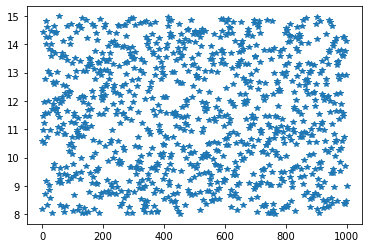

In [7]:
# Show distribution of SNRs. Should look grid like.

plt.plot(SNR,'*')
print('there are ',len(SNR),'unresolved signals')

In [8]:
# Numerical Derivatives - Source 1

logMchirp_delta = 1e-4
params_1_p = [logMchirp_1 + logMchirp_delta,eta_1,beta_1,Deff_1]
params_1_m = [logMchirp_1 - logMchirp_delta,eta_1,beta_1,Deff_1]

deriv_log_Mchirp_1 = (htilde(freq_bin,eps_AP,params_1_p) - htilde(freq_bin,eps_AP,params_1_m))/(2*logMchirp_delta)


eta_delta = 1e-6
params_1_p = [logMchirp_1,eta_1 + eta_delta,beta_1,Deff_1]
params_1_m = [logMchirp_1,eta_1 - eta_delta,beta_1,Deff_1]

deriv_log_eta_1 = (htilde(freq_bin,eps_AP,params_1_p) - htilde(freq_bin,eps_AP,params_1_m))/(2*eta_delta)



beta_delta = 1e-6
params_1_p = [logMchirp_1,eta_1,beta_1 + beta_delta,Deff_1]
params_1_m = [logMchirp_1,eta_1,beta_1 - beta_delta,Deff_1]

deriv_log_beta_1 = (htilde(freq_bin,eps_AP,params_1_p) - htilde(freq_bin,eps_AP,params_1_m))/(2*beta_delta)

# Source 2

logMchirp_delta = 1e-4
params_2_p = [logMchirp_2 + logMchirp_delta,eta_2,beta_2,Deff_2]
params_2_m = [logMchirp_2 - logMchirp_delta,eta_2,beta_2,Deff_2]

deriv_log_Mchirp_2 = (htilde(freq_bin,eps_AP,params_2_p) - htilde(freq_bin,eps_AP,params_2_m))/(2*logMchirp_delta)


eta_delta = 1e-6
params_2_p = [logMchirp_2,eta_2 + eta_delta,beta_2,Deff_2]
params_2_m = [logMchirp_2,eta_2 - eta_delta,beta_2,Deff_2]

deriv_log_eta_2 = (htilde(freq_bin,eps_AP,params_2_p) - htilde(freq_bin,eps_AP,params_2_m))/(2*eta_delta)



beta_delta = 1e-6
params_2_p = [logMchirp_2,eta_2,beta_2 + beta_delta,Deff_2]
params_2_m = [logMchirp_2,eta_2,beta_2 - beta_delta,Deff_2]

deriv_log_beta_2 = (htilde(freq_bin,eps_AP,params_2_p) - htilde(freq_bin,eps_AP,params_2_m))/(2*beta_delta)

# Source 3

logMchirp_delta = 1e-5
params_3_p = [logMchirp_3 + logMchirp_delta,eta_3,beta_3,Deff_3]
params_3_m = [logMchirp_3 - logMchirp_delta,eta_3,beta_3,Deff_3]

deriv_log_Mchirp_3 = (htilde(freq_bin,eps_AP,params_3_p) - htilde(freq_bin,eps_AP,params_3_m))/(2*logMchirp_delta)


eta_delta = 1e-5
params_3_p = [logMchirp_3,eta_3 + eta_delta,beta_3,Deff_3]
params_3_m = [logMchirp_3,eta_3 - eta_delta,beta_3,Deff_3]

deriv_log_eta_3 = (htilde(freq_bin,eps_AP,params_3_p) - htilde(freq_bin,eps_AP,params_3_m))/(2*eta_delta)



beta_delta = 1e-6
params_3_p = [logMchirp_3,eta_3,beta_3 + beta_delta,Deff_3]
params_3_m = [logMchirp_3,eta_3,beta_3 - beta_delta,Deff_3]

deriv_log_beta_3 = (htilde(freq_bin,eps_AP,params_3_p) - htilde(freq_bin,eps_AP,params_3_m))/(2*beta_delta)

# Source 4

logMchirp_delta = 1e-4
params_4_p = [logMchirp_4 + logMchirp_delta,eta_4,beta_4,Deff_4]
params_4_m = [logMchirp_4 - logMchirp_delta,eta_4,beta_4,Deff_4]

deriv_log_Mchirp_4 = (htilde(freq_bin,eps_AP,params_4_p) - htilde(freq_bin,eps_AP,params_4_m))/(2*logMchirp_delta)


eta_delta = 1e-6
params_4_p = [logMchirp_4,eta_4 + eta_delta,beta_4,Deff_4]
params_4_m = [logMchirp_4,eta_4 - eta_delta,beta_4,Deff_4]

deriv_log_eta_4 = (htilde(freq_bin,eps_AP,params_4_p) - htilde(freq_bin,eps_AP,params_4_m))/(2*eta_delta)



beta_delta = 1e-6
params_4_p = [logMchirp_4,eta_4,beta_4 + beta_delta,Deff_4]
params_4_m = [logMchirp_4,eta_4,beta_4 - beta_delta,Deff_4]

deriv_log_beta_4 = (htilde(freq_bin,eps_AP,params_4_p) - htilde(freq_bin,eps_AP,params_4_m))/(2*beta_delta)



diff_vec = [deriv_log_Mchirp_1,deriv_log_eta_1,deriv_log_beta_1,
            deriv_log_Mchirp_2,deriv_log_eta_2,deriv_log_beta_2,
            deriv_log_Mchirp_3,deriv_log_eta_3,deriv_log_beta_3,
            deriv_log_Mchirp_4,deriv_log_eta_4,deriv_log_beta_4]

fish_mix = np.eye(4*3)
for i in range(0,4*3):
    for j in range(0,4*3):
        fish_mix[i,j] = inner_prod(diff_vec[i],diff_vec[j],PSD,delta_f)  # Build FM
        
        

import mpmath as mp
mp.dps = 4000;  

fish_mix_prec = mp.matrix(fish_mix)

fish_mix_inv = fish_mix_prec**-1

Cov_Matrix = np.eye(4*3)
for i in range(0,4*3):
    for j in range(0,4*3):
        Cov_Matrix[i,j] = float(fish_mix_inv[i,j])  # Build FM

In [9]:
# MCMC

# MCMC
"""
Created on Mon Nov 25 23:53:26 2019

@author: Ollie
"""

import numpy as np
import scipy as sp
import random as rd
import matplotlib.pyplot as plt

def llike(pdgrm, variances):
    """
    Computes log (Whittle) likelihood 
    """

    return -0.5 * sum(pdgrm / variances)

def lprior_logM_chirp(logM_chirp,logM_chirp_low, logM_chirp_high):
    """
    Prior on amplitude - uniform
    """

    if logM_chirp < logM_chirp_low or logM_chirp > logM_chirp_high:
        print('rejected logM_chirp')
        return -1e100
    else:
        return 0
    
def lprior_eta(eta,eta_low, eta_high):
    """
    Prior on amplitude - uniform
    """
    if eta < eta_low or eta > eta_high:
        print('rejected eta')

        return -1e100
    else:
        return 0
    
def lprior_beta(beta,beta_low, beta_high):
    """
    Prior on amplitude - uniform
    """

    if beta < beta_low or beta > beta_high:
        print('rejected beta')
        return -1e100
    else:
        return 0

    
def lpost(pdgrm, variances,
          logM_chirp_1,logM_chirp_2,logM_chirp_3, logM_chirp_4, logM_chirp_low,logM_chirp_high,
          eta_1, eta_2, eta_3, eta_4, eta_low, eta_high,
          beta_1, beta_2, beta_3, beta_4, beta_low, beta_high):
    '''
    Compute log posterior
    '''
    
    return(lprior_logM_chirp(logM_chirp_1,logM_chirp_low, logM_chirp_high) +
           lprior_logM_chirp(logM_chirp_2,logM_chirp_low, logM_chirp_high) +
           lprior_logM_chirp(logM_chirp_3,logM_chirp_low, logM_chirp_high) +
           lprior_logM_chirp(logM_chirp_4,logM_chirp_low, logM_chirp_high) +
           lprior_eta(eta_1,eta_low, eta_high) + 
           lprior_eta(eta_2,eta_low, eta_high) +
           lprior_eta(eta_3,eta_low, eta_high) +
           lprior_eta(eta_4,eta_low, eta_high) +
           lprior_beta(beta_1,beta_low, beta_high) +
           lprior_beta(beta_2,beta_low, beta_high) +
           lprior_beta(beta_3,beta_low, beta_high) +
           lprior_beta(beta_4,beta_low, beta_high) +
           + llike(pdgrm, variances))


def accept_reject(lp_prop, lp_prev):
    '''
    Compute log acceptance probability (minimum of 0 and log acceptance rate)
    Decide whether to accept (1) or reject (0)
    '''
    u = np.random.uniform(size = 1)  # U[0, 1]
    r = np.minimum(0, lp_prop - lp_prev)  # log acceptance probability
    if np.log(u) < r:
        return(1)  # Accept
    else:
        return(0)  # Reject
    
 

def accept_rate(parameter):
    '''
    Compute acceptance rate for a specific parameter
    Used to adapt the proposal variance in a MH sampler
    Input: parameter (sequence of samples of a parameter)
    '''
    rejections = 0
    for i in range(len(parameter) - 1):  # Count rejections
        rejections = rejections + (parameter[i + 1] == parameter[i])
    reject_rate = rejections / (len(parameter) - 1)  # Rejection rate
    return(1 - reject_rate)  # Return acceptance rate
    

#####
#####
    

def MCMC_full(data_f,f, true_vals,D_vec,Cov_Matrix,
                          Variances,
                           M_chirp_high,M_chirp_low,
                           eta_high, eta_low,
                           beta_high, beta_low,
                           Ntotal, 
                           burnin, 
                           printerval = 50):

    
    np.random.seed(2) # Set the seed
    
    
    logM_chirp_1 = []   # Initialise empty vectors
    eta_1 = []
    beta_1 = []
    Deff_1 = []
    
    logM_chirp_2 = []   # Initialise empty vectors
    eta_2 = []
    beta_2 = []
    Deff_2 = []
    
    logM_chirp_3 = []   # Initialise empty vectors
    eta_3 = []
    beta_3 = []
    Deff_3 = []
    
    logM_chirp_4 = []   # Initialise empty vectors
    eta_4 = []
    beta_4 = []
    Deff_4 = []   

    # Append true values. We are starting on the true parmaeters here.
    
    logM_chirp_1.append(true_vals[0])
    eta_1.append(true_vals[1])
    beta_1.append(true_vals[2])
    Deff_1.append(D_vec[0])
    
    logM_chirp_2.append(true_vals[3])
    eta_2.append(true_vals[4])
    beta_2.append(true_vals[5])
    Deff_2.append(D_vec[1])

    
    logM_chirp_3.append(true_vals[6])
    eta_3.append(true_vals[7])
    beta_3.append(true_vals[8])
    Deff_3.append(D_vec[2])
    
    logM_chirp_4.append(true_vals[9])
    eta_4.append(true_vals[10])
    beta_4.append(true_vals[11])
    Deff_4.append(D_vec[3])
    
    
    delta_f = f[1] - f[0]   # Extract sampling interval
    
    params_1 = [logM_chirp_1[0],eta_1[0],beta_1[0],Deff_1[0]]
    params_2 = [logM_chirp_2[0],eta_2[0],beta_2[0],Deff_2[0]]
    params_3 = [logM_chirp_3[0],eta_3[0],beta_3[0],Deff_3[0]]
    params_4 = [logM_chirp_4[0],eta_4[0],beta_4[0],Deff_4[0]]
    
    # Build initial signals in the frequency domain
    
    signal_init_f_1 = htilde(f,eps_AP,params_1)
    signal_init_f_2 = htilde(f,eps_AP,params_2)
    signal_init_f_3 = htilde(f,eps_AP,params_3)
    signal_init_f_4 = htilde(f,eps_AP,params_4)
    
    # Compute total of signals.
    
    signal_f_init_tot = signal_init_f_1 + signal_init_f_2 +signal_init_f_3 + signal_init_f_4

    # Compute periodogram
    pdgrm = abs(data_f - signal_f_init_tot)**2  
                                                      
    # Initial value for log posterior
    lp = []
    lp.append(lpost(pdgrm, variances,
                    logM_chirp_1[0], logM_chirp_2[0],logM_chirp_3[0],logM_chirp_4[0], logM_chirp_low, logM_chirp_high,
                    eta_1[0], eta_2[0], eta_3[0], eta_4[0], eta_low, eta_high,
                    beta_1[0], beta_2[0], beta_3[0], beta_4[0], beta_low, beta_high))
    
    lp_store = lp[0]  # Create log posterior storage to be overwritten

    accept_reject_count = [0]   
    #####                                                  
    # Run MCMC
    #####
    for i in range(1, Ntotal):

        if i % printerval == 0:
            print("i = ", i)  # Iteration and Acceptance/Rejection ratio 
            print("acceptance_reject ratio", 100*sum(accept_reject_count)/len(accept_reject_count),'percent')
            

        ####
        
        lp_prev = lp_store  # Call previous stored log posterior

        prev_vec = [logM_chirp_1[i - 1], eta_1[i - 1], beta_1[i - 1],
                   logM_chirp_2[i - 1], eta_2[i - 1], beta_2[i - 1],
                   logM_chirp_3[i - 1], eta_3[i - 1], beta_3[i - 1],
                   logM_chirp_4[i - 1], eta_4[i - 1], beta_4[i - 1]]
    
        
        
        prop_vec = np.random.multivariate_normal(prev_vec, (1/4)*Cov_Matrix)
        
        # Draw from a multivarite Gaussian with covariance equal to the inverse of the
        # Fisher matrix. The (1/4) is used to help sampling efficiency.
        


        logM_chirp_prop_1 = prop_vec[0]
        eta_prop_1 = prop_vec[1]
        beta_prop_1 = prop_vec[2]
        
        logM_chirp_prop_2 = prop_vec[3]
        eta_prop_2 = prop_vec[4]
        beta_prop_2 = prop_vec[5]

        logM_chirp_prop_3 = prop_vec[6]
        eta_prop_3 = prop_vec[7]
        beta_prop_3 = prop_vec[8]
        
        logM_chirp_prop_4 = prop_vec[9]
        eta_prop_4 = prop_vec[10]
        beta_prop_4 = prop_vec[11]
        
#         print(eta_prop_1,eta_prop_2,eta_prop_3,eta_prop_4)
        
        param_1_prop = [logM_chirp_prop_1, eta_prop_1, beta_prop_1, Deff_1[0]]
        param_2_prop = [logM_chirp_prop_2, eta_prop_2, beta_prop_2, Deff_2[0]]
        param_3_prop = [logM_chirp_prop_3, eta_prop_3, beta_prop_3, Deff_3[0]]
        param_4_prop = [logM_chirp_prop_4, eta_prop_4, beta_prop_4, Deff_4[0]]
        
        signal_prop_f_1  = htilde(f,eps_AP,param_1_prop)  # New proposed signal
        signal_prop_f_2  = htilde(f,eps_AP,param_2_prop)  # New proposed signal
        signal_prop_f_3  = htilde(f,eps_AP,param_3_prop)  # New proposed signal
        signal_prop_f_4  = htilde(f,eps_AP,param_4_prop)  # New proposed signal
        
        # Compute proposed signal to compare with the data
        
        signal_prop_f_tot = signal_prop_f_1 + signal_prop_f_2 + signal_prop_f_3 + signal_prop_f_4
        
        pdgrm_prop = abs(data_f - signal_prop_f_tot)**2  # Compute periodigram
        
        
        # Compute log posterior
        lp_prop = lpost(pdgrm_prop, variances, 
                         logM_chirp_prop_1,logM_chirp_prop_2,logM_chirp_prop_3,logM_chirp_prop_4,logM_chirp_low,logM_chirp_high,
                           eta_prop_1,eta_prop_2,eta_prop_3,eta_prop_4, eta_low, eta_high,
                             beta_prop_1, beta_prop_2, beta_prop_3, beta_prop_4, beta_low, beta_high)  # Compute proposed log posterior
        

        if accept_reject(lp_prop, lp_prev) == 1:  # Accept
            logM_chirp_1.append(logM_chirp_prop_1) 
            eta_1.append(eta_prop_1)
            beta_1.append(beta_prop_1)

            logM_chirp_2.append(logM_chirp_prop_2) 
            eta_2.append(eta_prop_2)
            beta_2.append(beta_prop_2)
            
            logM_chirp_3.append(logM_chirp_prop_3) 
            eta_3.append(eta_prop_3)
            beta_3.append(beta_prop_3)
            
            logM_chirp_4.append(logM_chirp_prop_4) 
            eta_4.append(eta_prop_4)
            beta_4.append(beta_prop_4)
            
            accept_reject_count.append(1)  # Add one to counter
              
            lp_store = lp_prop  # Overwrite lp_store

        else:  # Reject
            
            logM_chirp_1.append(logM_chirp_1[i - 1]) 
            eta_1.append(eta_1[i - 1])
            beta_1.append(beta_1[i - 1])

            logM_chirp_2.append(logM_chirp_2[i - 1]) 
            eta_2.append(eta_2[i - 1])
            beta_2.append(beta_2[i - 1])
            
            logM_chirp_3.append(logM_chirp_3[i - 1]) 
            eta_3.append(eta_3[i - 1])
            beta_3.append(beta_3[i - 1])
            
            logM_chirp_4.append(logM_chirp_4[i - 1]) 
            eta_4.append(eta_4[i - 1])
            beta_4.append(beta_4[i - 1])
            
            accept_reject_count.append(0)  # Add 0 to counter
              
        lp.append(lp_store)  # Add log posterior value
        


        
    return logM_chirp_1,eta_1,beta_1,logM_chirp_2,eta_2,beta_2,logM_chirp_3,eta_3,beta_3,logM_chirp_4,eta_4,beta_4,lp

In [10]:

variances = (PSD)/(4*delta_f)   # Variances (denominator of likelihood)

noise_1 = np.random.normal(0,np.sqrt(variances))
noise_2 = np.random.normal(0,np.sqrt(variances))

noise_f = noise_1 + 1j*noise_2  # Construct noise in the frequency domain

# Data stream: 4 (true) signals + unresolved signals + noise

data_f = h_f_1 + h_f_2 + h_f_3 + h_f_4 + sum_unres_h_f + noise_f

Ntotal = 100000  # Number of iterations
burnin = 0  # burnin: unnecessary since we start at the true parameters

# Construct uniform priors for all parameters.

logM_chirp_low = -100  
logM_chirp_high = np.log(3e10)     

eta_low = 0
eta_high = 0.25

beta_low = 0
beta_high = 9.4


true_vals = [np.log(M_chirp_1),eta_1,beta_1,
            np.log(M_chirp_2),eta_2,beta_2,
            np.log(M_chirp_3),eta_3,beta_3,
            np.log(M_chirp_4),eta_4,beta_4]  # True values to start chain with 

D_vec = [Deff_1,Deff_2,Deff_3,Deff_4]

# Run the algorithm
logM_chirp_1_samps,eta_1_samps,beta_1_samps,logM_chirp_2_samps,eta_2_samps,beta_2_samps,logM_chirp_3_samps,eta_3_samps,beta_3_samps,logM_chirp_4_samps,eta_4_samps,beta_4_samps,lp = MCMC_full(data_f,
                                                   freq_bin, true_vals,D_vec,Cov_Matrix,
                                                   variances,
                                                   logM_chirp_high,logM_chirp_low,
                                                   eta_high,eta_low,
                                                   beta_high,beta_low,
                                                   Ntotal, 
                                                   burnin, 
                                                   printerval = 2000,
                                                   )



i =  2000
acceptance_reject ratio 42.05 percent
i =  4000
acceptance_reject ratio 41.425 percent
i =  6000
acceptance_reject ratio 41.03333333333333 percent
i =  8000
acceptance_reject ratio 41.35 percent
i =  10000
acceptance_reject ratio 41.35 percent
i =  12000
acceptance_reject ratio 40.916666666666664 percent
i =  14000
acceptance_reject ratio 40.785714285714285 percent
i =  16000
acceptance_reject ratio 40.5875 percent
i =  18000
acceptance_reject ratio 40.888888888888886 percent
i =  20000
acceptance_reject ratio 40.76 percent
i =  22000
acceptance_reject ratio 40.61818181818182 percent
i =  24000
acceptance_reject ratio 40.4875 percent
i =  26000
acceptance_reject ratio 40.534615384615385 percent
i =  28000
acceptance_reject ratio 40.39642857142857 percent
i =  30000
acceptance_reject ratio 40.38 percent
i =  32000
acceptance_reject ratio 40.3625 percent
i =  34000
acceptance_reject ratio 40.37647058823529 percent
i =  36000
acceptance_reject ratio 40.394444444444446 percent
i 

In [11]:
# Here we should see that the FM predictions on the standard deviations of the parameters are 
# less than the variance of the recovered parameters found through MCMC.

# If the standard deviations from the FM are > standard deviations from MCMC run the chains for longer. 
# it's simply a statistical fluctuation. The FM provides the cramer rao bound on the variance on the 
# parameters. In english, the lowest variance attainable.

print("Source 1")
print('MCMC logM_chirp:',np.sqrt(np.var(logM_chirp_1_samps)))
print('MCMC eta:',np.sqrt(np.var(eta_1_samps)))
print('MCMC beta:',np.sqrt(np.var(beta_1_samps)))

print('FM:',np.sqrt(np.diag(Cov_Matrix)[0:3]))

print("Source 2")
print('MCMC logM_chirp:',np.sqrt(np.var(logM_chirp_2_samps)))
print('MCMC eta:',np.sqrt(np.var(eta_2_samps)))
print('MCMC beta:',np.sqrt(np.var(beta_2_samps)))

print('FM:',np.sqrt(np.diag(Cov_Matrix)[3:6]))

print("Source 3")
print('MCMC logM_chirp:',np.sqrt(np.var(logM_chirp_3_samps)))
print('MCMC eta:',np.sqrt(np.var(eta_3_samps)))
print('MCMC beta:',np.sqrt(np.var(beta_3_samps)))

print('FM:',np.sqrt(np.diag(Cov_Matrix)[6:9]))

print("Source 4")
print('MCMC logM_chirp:',np.sqrt(np.var(logM_chirp_4_samps)))
print('MCMC eta:',np.sqrt(np.var(eta_4_samps)))
print('MCMC beta:',np.sqrt(np.var(beta_4_samps)))

print('FM:',np.sqrt(np.diag(Cov_Matrix)[9:12]))

Source 1
MCMC logM_chirp: 8.886959201019668e-05
MCMC eta: 0.0003896040932837763
MCMC beta: 0.01801850171326834
FM: [8.45199337e-05 3.64716444e-04 1.69207845e-02]
Source 2
MCMC logM_chirp: 1.684756476119652e-05
MCMC eta: 5.102289798536614e-05
MCMC beta: 0.0028951031378658247
FM: [1.61924102e-05 4.66601312e-05 2.63473104e-03]
Source 3
MCMC logM_chirp: 1.2102242017975317e-05
MCMC eta: 1.9583710071422012e-05
MCMC beta: 0.0006895794296107048
FM: [8.45172295e-06 1.90222897e-05 6.82256154e-04]
Source 4
MCMC logM_chirp: 1.0173544953462065e-05
MCMC eta: 6.419887255209988e-05
MCMC beta: 0.0021786406352989588
FM: [1.00404554e-05 6.33497813e-05 2.14175980e-03]


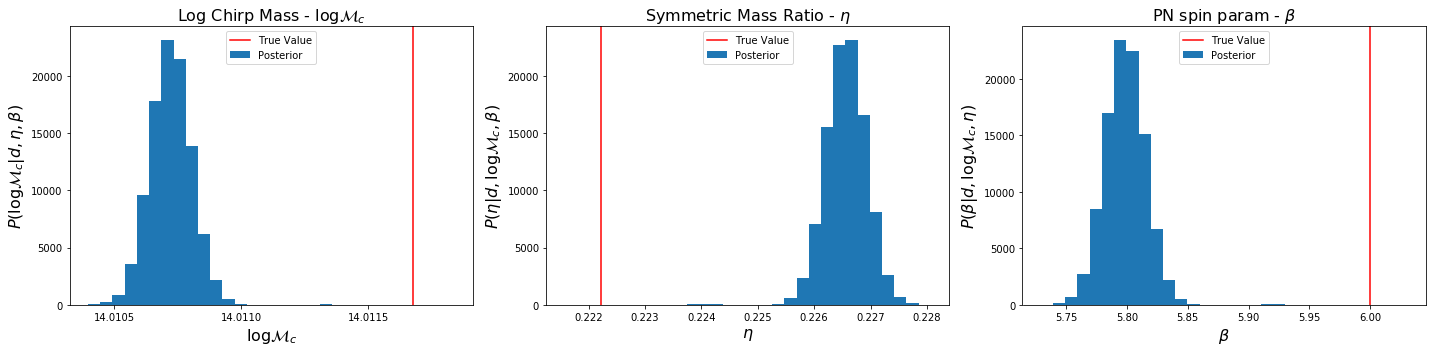

In [12]:
# Results

fig,ax = plt.subplots(1,3,figsize = (20,5))

ax[0].hist(logM_chirp_1_samps,bins = 30,label = 'Posterior')
ax[0].axvline(x = np.log(M_chirp_1),c = 'red', label = 'True Value')
ax[0].set_xlabel(r'$\log \mathcal{M}_{c}$',fontsize = 16)
ax[0].set_ylabel(r'$P(\log \mathcal{M}_{c}|d,\eta,\beta)$',fontsize = 16)
ax[0].set_title(r'Log Chirp Mass - $\log \mathcal{M}_{c}$',fontsize = 16)
ax[0].locator_params(axis='x', nbins=5)
ax[0].legend()




ax[1].hist(eta_1_samps,bins = 30,label = 'Posterior')
ax[1].axvline(x = eta_1,c = 'red', label = 'True Value')
ax[1].set_xlabel(r'$\eta$',fontsize = 16)
ax[1].set_ylabel(r'$P(\eta|d,\log \mathcal{M}_{c},\beta)$',fontsize = 16)
ax[1].set_title(r'Symmetric Mass Ratio - $\eta$',fontsize = 16)
ax[1].legend()



ax[2].hist(beta_1_samps,bins = 30,label = 'Posterior')
ax[2].axvline(x = beta_1,c = 'red', label = 'True Value')
ax[2].set_xlabel(r'$\beta$',fontsize = 16)
ax[2].set_ylabel(r'$P(\beta|d,\log \mathcal{M}_{c},\eta)$',fontsize = 16)
ax[2].set_title(r'PN spin param - $\beta$',fontsize = 16)
ax[2].legend()
plt.tight_layout()

In [13]:
# Generalised CV Formalism - predict the biases!

deltaH = sum_unres_h_f  # unresolved signals

waveform_errors = (htilde(freq_bin,eps_GR,pars_1) - htilde(freq_bin,eps_AP,pars_1) + 
                   htilde(freq_bin,eps_GR,pars_2) - htilde(freq_bin,eps_AP,pars_2) + 
                   htilde(freq_bin,eps_GR,pars_3) - htilde(freq_bin,eps_AP,pars_3) + 
                   htilde(freq_bin,eps_GR,pars_4) - htilde(freq_bin,eps_AP,pars_4)) # Waveform errors

deltah = noise_f + waveform_errors + deltaH  # Total error

b_vec_n = [inner_prod(diff_vec[i],noise_f,PSD,delta_f) for i in range(0,12)] # noise
b_vec_waveform_errors = [inner_prod(diff_vec[i],waveform_errors,PSD,delta_f) for i in range(0,12)] # waveform errors
b_vec_unresolved_signals = [inner_prod(diff_vec[i],deltaH,PSD,delta_f) for i in range(0,12)] # unresolved errors


biases_pred_n = np.matmul(Cov_Matrix,b_vec_n)  # statistical b vector 
biases_pred_waveform_errors = np.matmul(Cov_Matrix,b_vec_waveform_errors) # systematic bias b vector
biases_pred_unresolved = np.matmul(Cov_Matrix,b_vec_unresolved_signals) # unresolved signal bias b vector

# Total bias contribution

biases_pred_unresolved_total =  biases_pred_waveform_errors + biases_pred_unresolved +biases_pred_n 

In [14]:
M_chirp_bias_1 = biases_pred_unresolved_total[0]
eta_bias_1 = biases_pred_unresolved_total[1]
beta_bias_1 = biases_pred_unresolved_total[2]

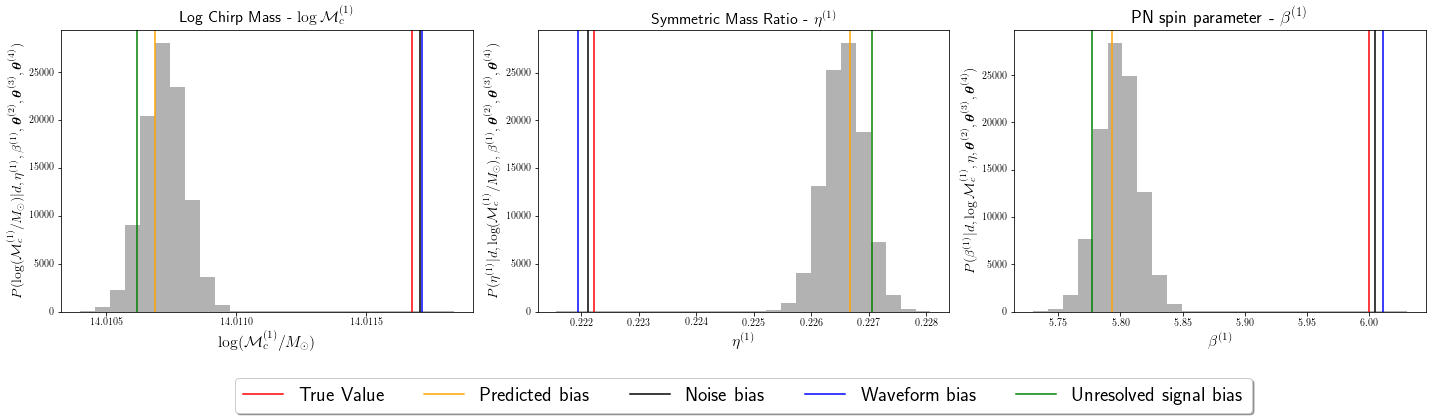

In [15]:
# Results
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

fig,ax = plt.subplots(1,3,figsize = (20,6))
alpha_val = 0.3

ax[0].hist(logM_chirp_1_samps,bins = 25,color = 'black', histtype = 'stepfilled', alpha = alpha_val)
ax[0].axvline(x = np.log(M_chirp_1),color = 'red',  label = 'True Value')
ax[0].axvline(x = np.log(M_chirp_1) + M_chirp_bias_1, color = 'orange', label = 'Predicted bias')
ax[0].axvline(x = np.log(M_chirp_1) + biases_pred_n[0],c = 'black',label = 'Noise bias' )
ax[0].axvline(x = np.log(M_chirp_1) + biases_pred_waveform_errors[0],c = 'blue',label = 'Waveform bias' )
ax[0].axvline(x = np.log(M_chirp_1) + biases_pred_unresolved[0],c = 'green',label = 'Unresolved  signal bias' )
ax[0].set_xlabel(r'$\log (\mathcal{M}^{(1)}_{c}/M_{\odot})$',fontsize = 16)
ax[0].set_ylabel(r'$P(\log (\mathcal{M}^{(1)}_{c}/M_{\odot})|d,\eta^{(1)},\beta^{(1)},\boldsymbol{\theta}^{(2)},\boldsymbol{\theta}^{(3)},\boldsymbol{\theta}^{(4)})$',fontsize = 14)
ax[0].set_title(r'Log Chirp Mass - $\log \mathcal{M}^{(1)}_{c}$',fontsize = 16)
ax[0].locator_params(axis='x', nbins=5)



ax[1].hist(eta_1_samps,bins = 25, color = 'black', alpha = alpha_val)
ax[1].axvline(x = eta_1,c = 'red', label = 'True Value')
ax[1].axvline(x = eta_1 + eta_bias_1, color = 'orange', label = 'Predicted bias')
ax[1].axvline(x = eta_1 + biases_pred_n[1],c = 'black',label = 'Noise bias' )
ax[1].axvline(x = eta_1 + biases_pred_waveform_errors[1],c = 'blue',label = 'Waveform bias' )
ax[1].axvline(x = eta_1 + biases_pred_unresolved[1],c = 'green',label = 'Unresolved signal bias' )
ax[1].set_xlabel(r'$\eta^{(1)}$',fontsize = 16)
ax[1].set_ylabel(r'$P(\eta^{(1)}|d,\log (\mathcal{M}^{(1)}_{c}/M_{\odot}),\beta^{(1)},\boldsymbol{\theta}^{(2)},\boldsymbol{\theta}^{(3)},\boldsymbol{\theta}^{(4)})$',fontsize = 14)
ax[1].set_title(r'Symmetric Mass Ratio - $\eta^{(1)}$',fontsize = 16)


ax[2].hist(beta_1_samps,bins = 25, color = 'black', histtype = 'stepfilled', alpha = alpha_val)
ax[2].axvline(x = beta_1,c = 'red', label = 'True Value')
ax[2].axvline(x = beta_1 + beta_bias_1,c = 'orange',label = 'Predicted bias' )
ax[2].axvline(x = beta_1 + biases_pred_n[2],c = 'black',label = 'Noise bias' )
ax[2].axvline(x = beta_1 + biases_pred_waveform_errors[2],c = 'blue',label = 'Waveform bias' )
ax[2].axvline(x = beta_1 + biases_pred_unresolved[2],c = 'green',label = 'Unresolved signal bias' )
ax[2].set_xlabel(r'$\beta^{(1)}$',fontsize = 16)
ax[2].set_ylabel(r'$P(\beta^{(1)}|d,\log \mathcal{M}^{(1)}_{c},\eta,\boldsymbol{\theta}^{(2)},\boldsymbol{\theta}^{(3)},\boldsymbol{\theta}^{(4)})$',fontsize = 14)
ax[2].set_title(r'PN spin parameter - $\beta^{(1)}$',fontsize = 18)
plt.tight_layout()

box = ax[1].get_position()

ax[1].legend(fontsize = 20, loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=5)

fig.subplots_adjust(bottom=0.27)

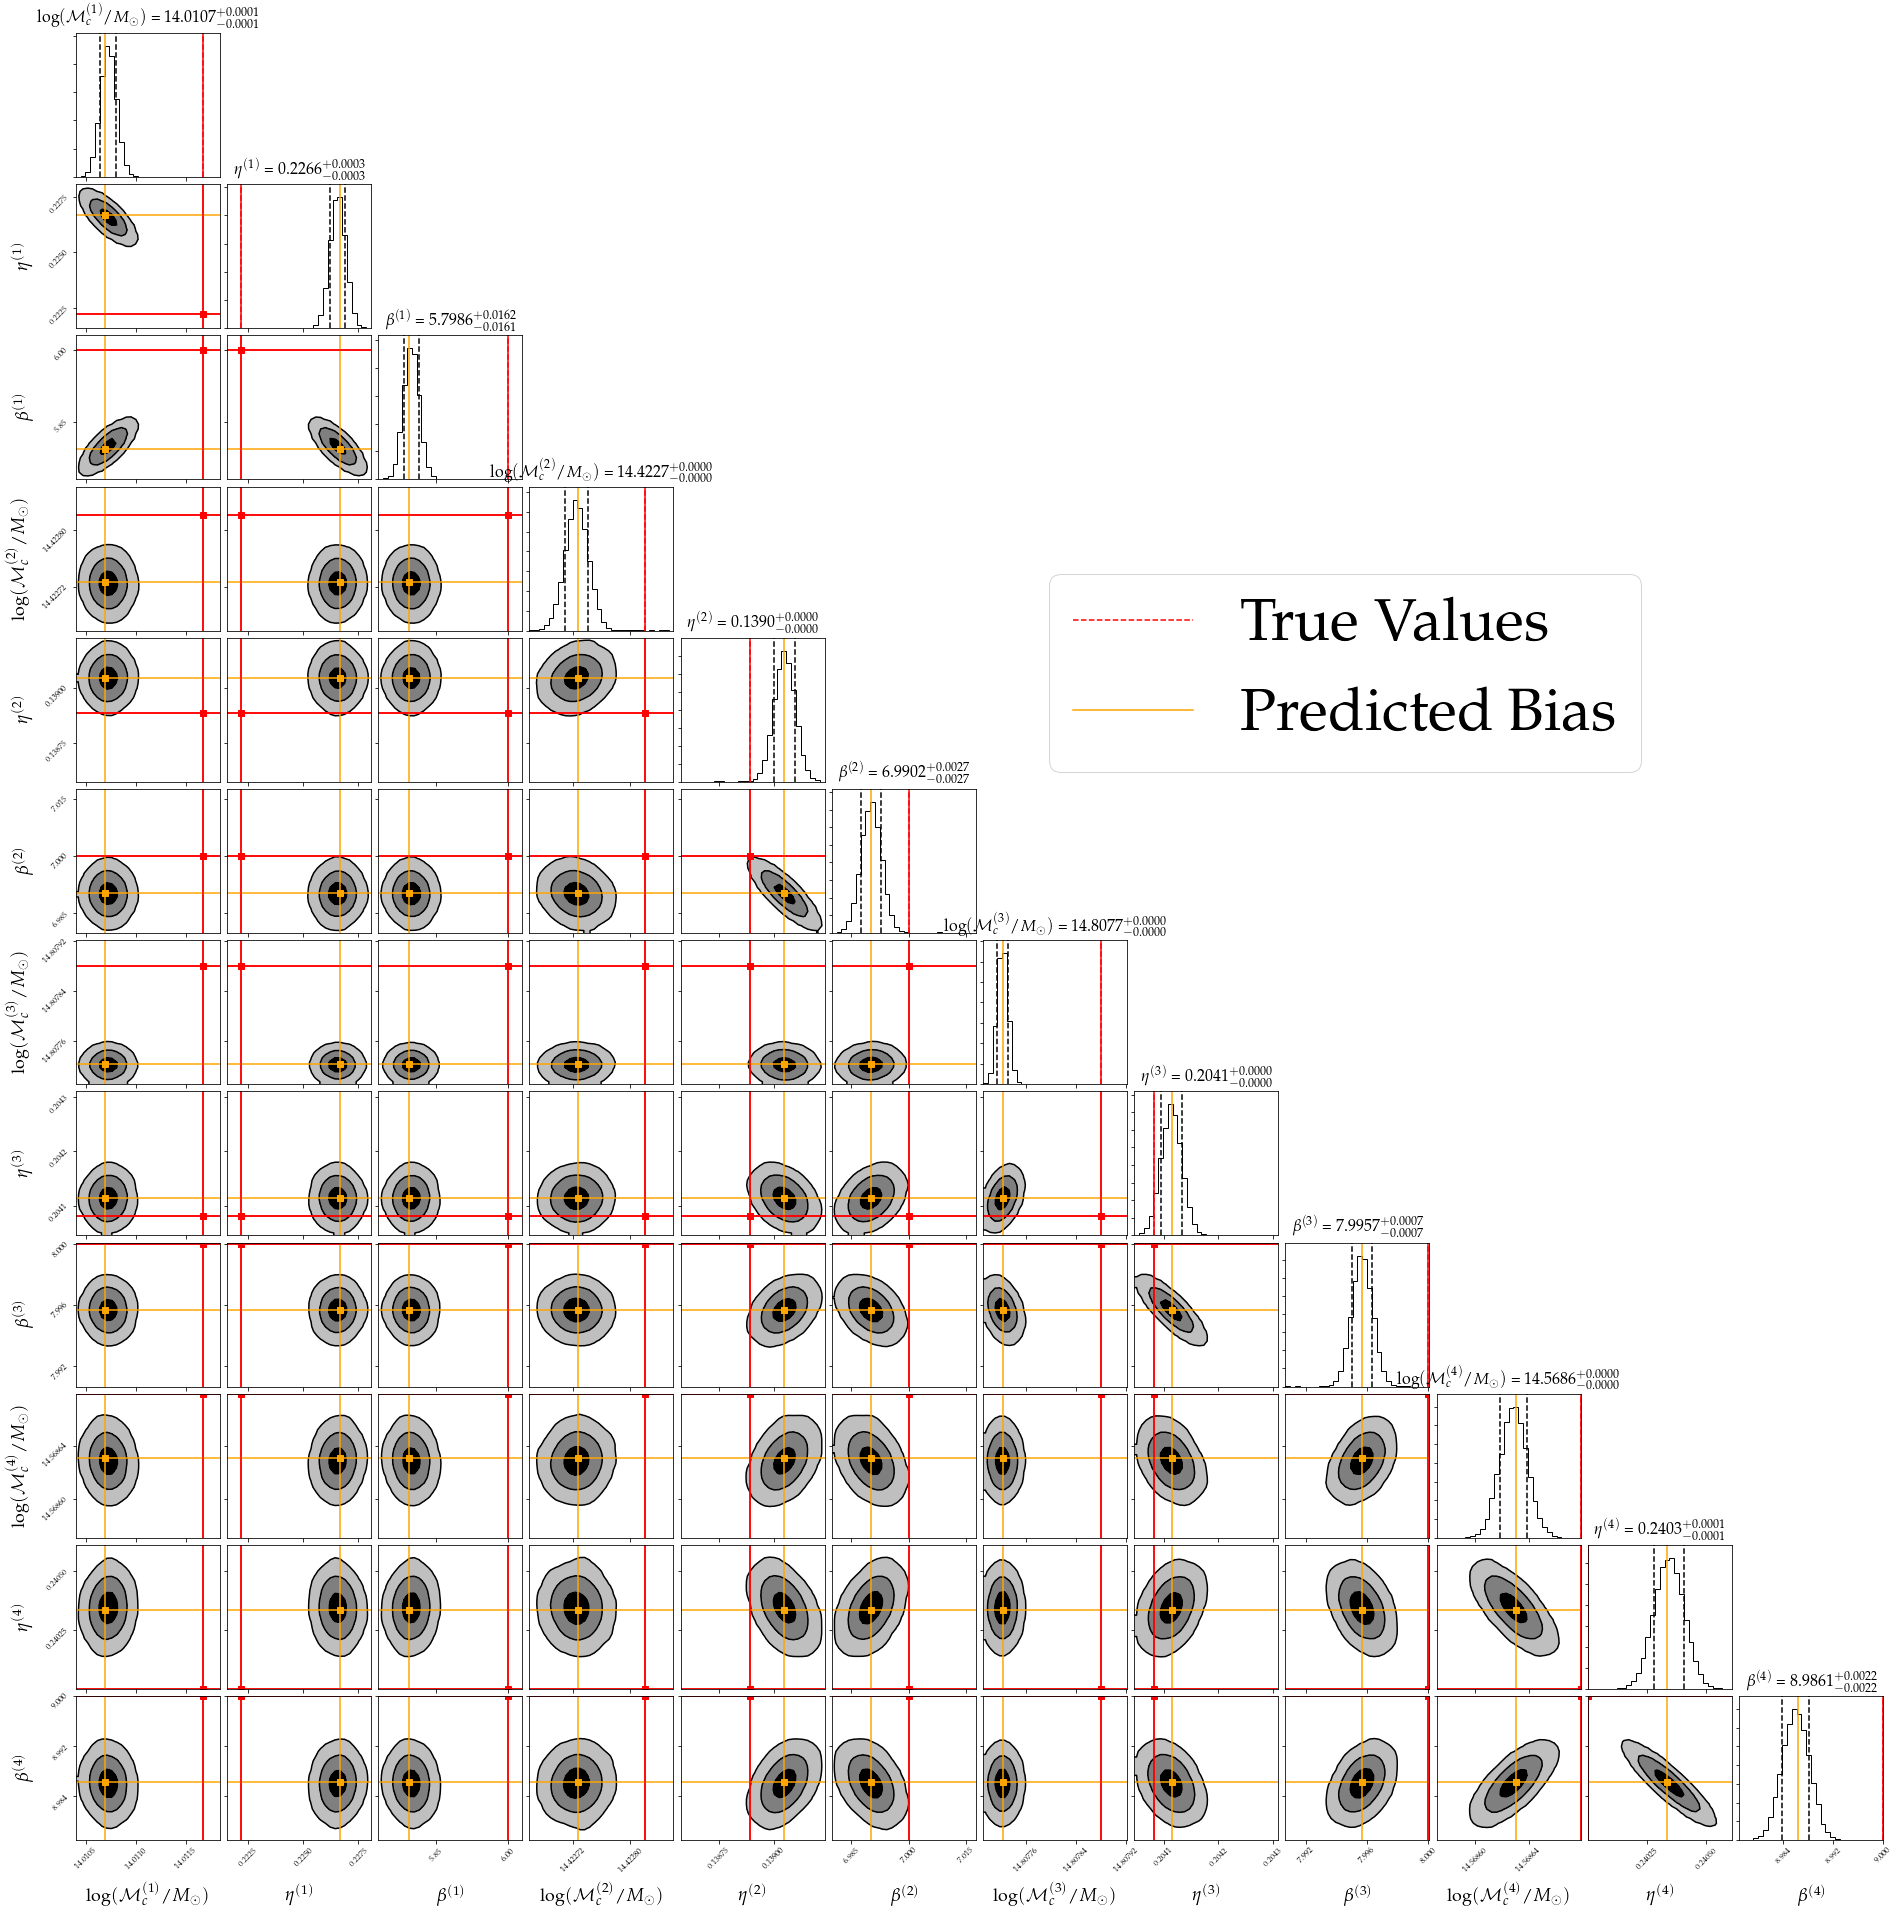

In [19]:
# Corner plot
import matplotlib as mpl
import matplotlib.patches as mpatches
import corner

plt.rcParams.update({'text.usetex': True,'font.family': 'serif', 'font.serif': ['Palatino'],'font.size':14})
 

# mpl.rcParams[‘axes.formatter.useoffset’] = False
CORNER_KWARGS = dict(
    smooth=0.99, # smooths out contours.
    plot_datapoints=False, # choose if you want datapoints
    label_kwargs=dict(fontsize=18), # font size for labels
    show_titles=True, #choose if you want titles on top of densities.
    title_kwargs=dict(fontsize=16), # font size for title
    plot_density=False,
    quantiles=[0.16, 0.84],  # add quantiles to plot densities.
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    fill_contours=True, #decide if you want to fill the contours
    max_n_ticks=3, # set a limit to ticks in the x-y axes.
    title_fmt='.4f', # format for high powers (here 10^2 ~ e+02 etc.)
    reverse=False  # if you are a madman, reverse the whole contour.
)

samples = np.column_stack([logM_chirp_1_samps,eta_1_samps,beta_1_samps,
                           logM_chirp_2_samps,eta_2_samps,beta_2_samps,
                           logM_chirp_3_samps,eta_3_samps,beta_3_samps,
                           logM_chirp_4_samps,eta_4_samps,beta_4_samps])

labels =[r"$\log (\mathcal{M}^{(1)}_{c}/M_{\odot})$", r"$\eta^{(1)}$", r"$\beta^{(1)}$",
          r"$\log (\mathcal{M}^{(2)}_{c}/M_{\odot})$", r"$\eta^{(2)}$", r"$\beta^{(2)}$",
          r"$\log (\mathcal{M}^{(3)}_{c}/M_{\odot})$", r"$\eta^{(3)}$", r"$\beta^{(3)}$",
          r"$\log (\mathcal{M}^{(4)}_{c}/M_{\odot})$", r"$\eta^{(4)}$", r"$\beta^{(4)}$"]
true_vals = [np.log(M_chirp_1),eta_1,beta_1,
             np.log(M_chirp_2),eta_2,beta_2,
             np.log(M_chirp_3),eta_3,beta_3,
             np.log(M_chirp_4),eta_4,beta_4]

fig = corner.corner(samples, bins=30,labels=labels,
                    truths=true_vals, 
                    truth_color="red",
                    color="black",**CORNER_KWARGS)
red_patch = mpatches.Patch(color="red", label="True values")

axes = np.array(fig.axes).reshape((12,12))

for i in range(12):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="red",linestyle = "--",label = 'True Values')
    ax.axvline(true_vals[i] + biases_pred_unresolved_total[i] , color="orange",label = 'Predicted Bias')
    
for yi in range(12):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true_vals[xi] + biases_pred_unresolved_total[xi] , color="orange")
        ax.axhline(true_vals[yi] + biases_pred_unresolved_total[yi] , color="orange")
        ax.plot(true_vals[xi] + biases_pred_unresolved_total[xi] , true_vals[yi] + biases_pred_unresolved_total[yi],
                color="orange",marker='s')
        ax.axhline(true_vals[yi], color="red")
        ax.axvline(true_vals[xi],color= "red")

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=8)
        
plt.legend(fontsize = 60,bbox_to_anchor=(-5., 9),
           loc="upper left")